In [2]:
# Install libraries
!pip install prophet

In [3]:
!pip install yfinance

In [4]:
# Dependencies
import requests
import time
from dotenv import load_dotenv
import pandas as pd
import json
import os
from datetime import datetime
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf

In [46]:
# import AAPL stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'AAPL', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('AAPL.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700
2024-09-27,228.460007,229.520004,227.300003,227.789993,227.789993,34026000
2024-09-30,230.039993,233.000000,229.649994,233.000000,233.000000,54541900


In [47]:
# import GOOGL stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'GOOGL', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('GOOGL.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300
2024-09-27,162.809998,165.699997,162.630005,163.949997,163.949997,21101300
2024-09-30,163.320007,166.149994,163.259995,165.850006,165.850006,20413900


In [48]:
# import MSFT stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'MSFT', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('MSFT.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400
2024-09-26,435.089996,435.299988,429.130005,431.309998,431.309998,14492000
2024-09-27,431.519989,431.850006,427.470001,428.019989,428.019989,14896100
2024-09-30,428.209991,430.420013,425.369995,430.299988,430.299988,16807300


In [45]:
# import META (Facebook) stock data from 2016 to 2024
start_date = '2016-01-01'
end_date = '2024-10-01'
ticker = 'META', 
data = yf.download(ticker, start_date, end_date)
display(data.tail())

filedata = data.to_csv('META.csv')

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-09-24,566.679993,567.750000,554.190002,563.330017,563.330017,12993000
2024-09-25,564.049988,576.880005,563.719971,568.309998,568.309998,16543400
2024-09-26,575.729980,577.400024,562.349976,567.840027,567.840027,14400800
2024-09-27,570.099976,570.840027,564.510010,567.359985,567.359985,9398400
2024-09-30,567.700012,574.679993,564.799988,572.440002,572.440002,12792300


In [9]:
# Import Data
apple_path = Path("AAPL.csv")
google_path = Path("GOOGL.csv")
microsoft_path = Path("MSFT.csv")
facebook_path = Path("META.csv")
sp500_path = Path("sp500.csv")

In [10]:
# Read stock data and index by date
apple_data = pd.read_csv(apple_path, index_col="Date", parse_dates=True)
google_data = pd.read_csv(google_path, index_col="Date", parse_dates=True)
microsoft_data = pd.read_csv(microsoft_path, index_col="Date", parse_dates=True)
facebook_data = pd.read_csv(facebook_path, index_col="Date", parse_dates=True)
sp500_data = pd.read_csv(sp500_path, index_col="Date", parse_dates=True)

In [11]:
# Slice Apple data from 2018-01-01 to 2024-10-01
apple_data_2018_2024 = apple_data.loc['2018-01-01':'2024-10-01']
apple_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.568947,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.561855,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.750275,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.214237,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.061150,82271200
...,...,...,...,...,...,...
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700
2024-09-26,227.300003,228.500000,225.410004,227.520004,227.520004,36636700


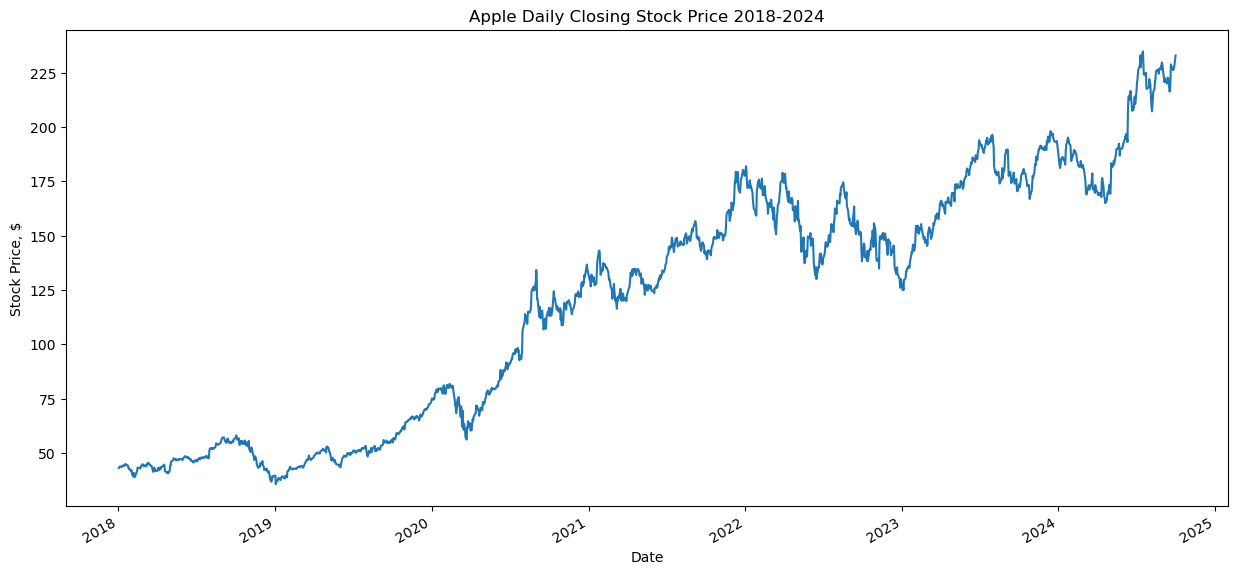

In [12]:
# Plot the closing prices of Apple from 2018-01-01 to 2024-10-01
apple_data_2018_2024['Close'].plot(title='Apple Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [13]:
# Slice Google data from 2018-01-01 to 2024-10-01
google_data_2018_2024 = google_data.loc['2018-01-01':'2024-10-01']
google_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,52.651001,53.799000,52.651001,53.660500,53.527954,31766000
2018-01-03,53.696499,54.805000,53.671501,54.576000,54.441196,31318000
2018-01-04,54.854500,55.203999,54.713001,54.787998,54.652668,26052000
2018-01-05,55.172501,55.679001,55.090000,55.514500,55.377377,30250000
2018-01-08,55.549999,55.958000,55.500000,55.710499,55.572891,24644000
...,...,...,...,...,...,...
2024-09-24,163.029999,163.220001,160.690002,162.289993,162.289993,23332100
2024-09-25,161.470001,162.809998,161.300003,161.490005,161.490005,18869200
2024-09-26,163.639999,164.080002,162.279999,162.729996,162.729996,20319300


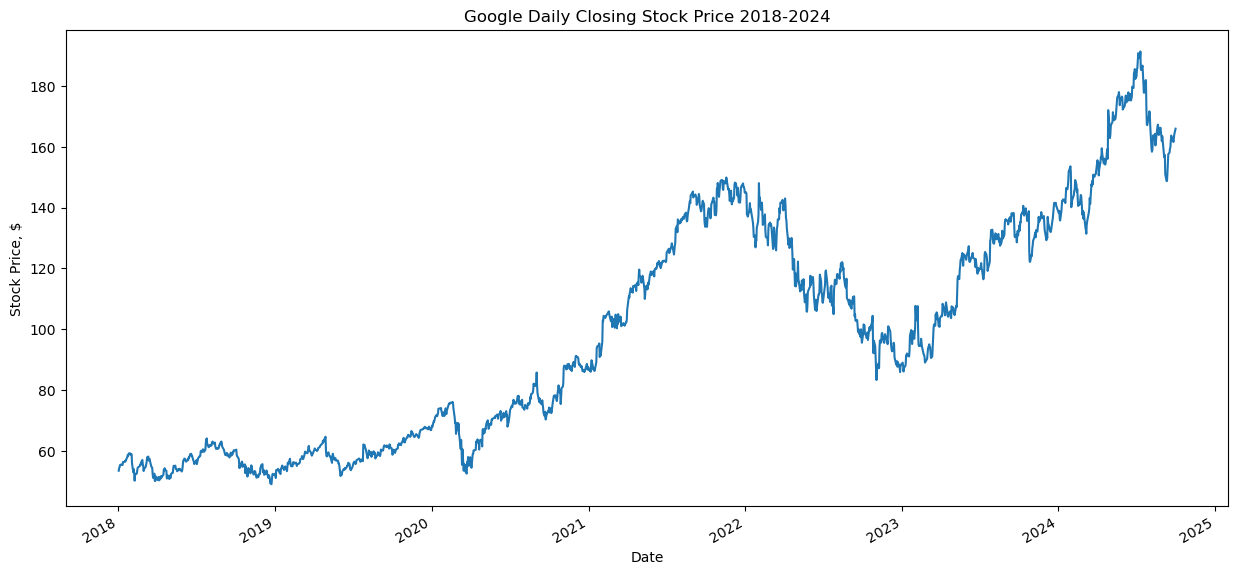

In [14]:
# Plot the closing prices of Google from 2018-01-01 to 2024-10-01
google_data_2018_2024['Close'].plot(title='Google Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [15]:
# Slice Microsoft data from 2018-01-01 to 2024-10-01
microsoft_data_2018_2024 = microsoft_data.loc['2018-01-01':'2024-10-01']
microsoft_data_2018_2024


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,86.129997,86.309998,85.500000,85.949997,79.792908,22483800
2018-01-03,86.059998,86.510002,85.970001,86.349998,80.164268,26061400
2018-01-04,86.589996,87.660004,86.570000,87.110001,80.869827,21912000
2018-01-05,87.660004,88.410004,87.430000,88.190002,81.872452,23407100
2018-01-08,88.199997,88.580002,87.599998,88.279999,81.956001,22113000
...,...,...,...,...,...,...
2024-09-24,433.000000,433.350006,426.100006,429.170013,429.170013,17015800
2024-09-25,429.829987,433.119995,428.570007,432.109985,432.109985,13396400
2024-09-26,435.089996,435.299988,429.130005,431.309998,431.309998,14492000


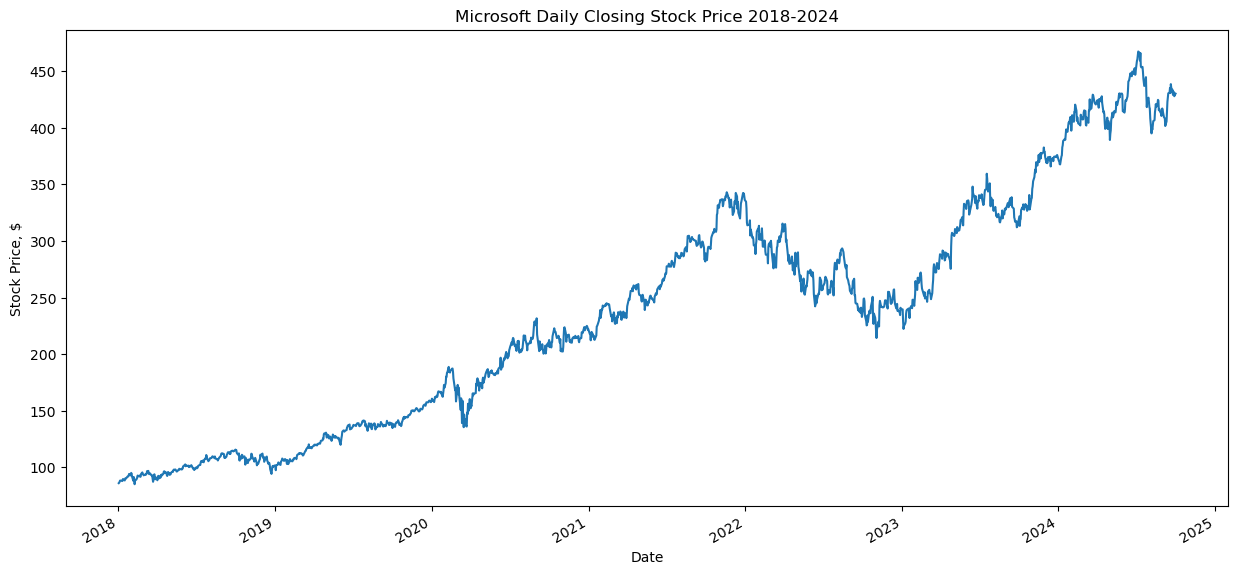

In [16]:
# Plot the closing prices of Microsoft from 2018-01-01 to 2024-10-01
microsoft_data_2018_2024['Close'].plot(title='Microsoft Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [17]:
# Slice Facebook/META data from 2018-01-01 to 2024-10-01
facebook_data_2018_2024 = facebook_data.loc['2018-01-01':'2024-10-01']
facebook_data_2018_2024

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,177.679993,181.580002,177.550003,181.419998,180.875412,18151900
2018-01-03,181.880005,184.779999,181.330002,184.669998,184.115662,16886600
2018-01-04,184.899994,186.210007,184.100006,184.330002,183.776672,13880900
2018-01-05,185.589996,186.899994,184.929993,186.850006,186.289108,13574500
2018-01-08,187.199997,188.899994,186.330002,188.279999,187.714813,17994700
...,...,...,...,...,...,...
2024-09-24,566.679993,567.750000,554.190002,563.330017,563.330017,12993000
2024-09-25,564.049988,576.880005,563.719971,568.309998,568.309998,16543400
2024-09-26,575.729980,577.400024,562.349976,567.840027,567.840027,14400800


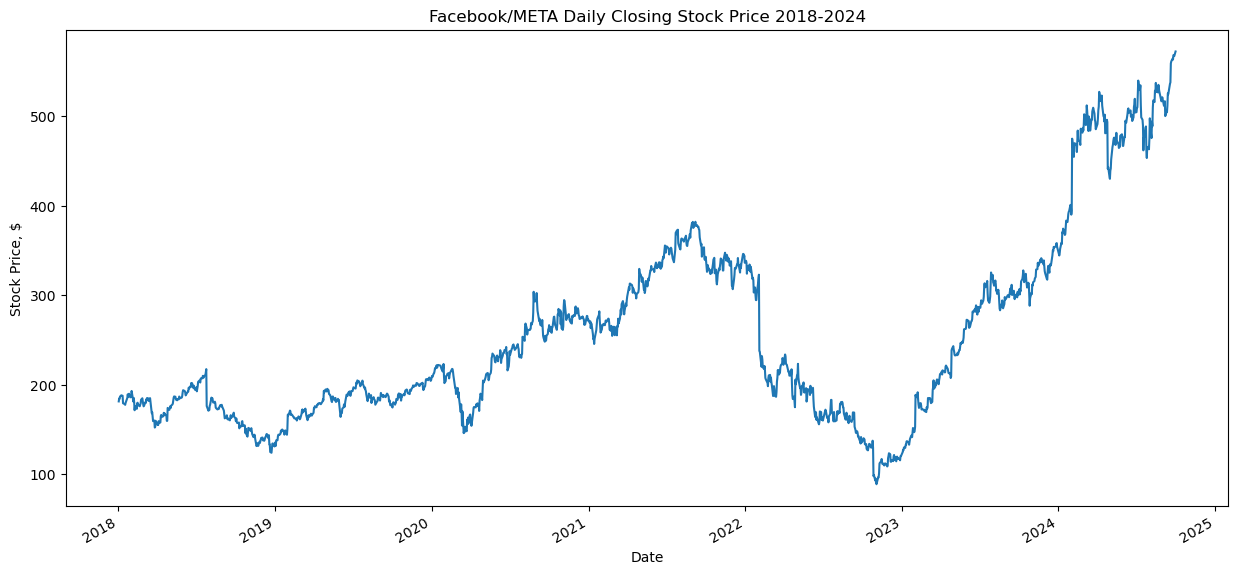

In [18]:
# Plot the closing prices of Facebook/META from 2018-01-01 to 2024-10-01
facebook_data_2018_2024['Close'].plot(title='Facebook/META Daily Closing Stock Price 2018-2024', figsize=(15,7))
x = plt.xlabel('Date')
y = plt.ylabel('Stock Price, $')

In [19]:
# Rename S&P500 column to Close
sp500_data = sp500_data.rename(columns={"S&P500": "Close"})

In [20]:
# Slice S&P 500 data from 2018-01-01 to 2024-10-01
sp500_data_2018_2024 = sp500_data.loc['2018-01-01':'2024-10-01']
sp500_data_2018_2024

,Close
Date,
2018-01-02,2695.81
2018-01-03,2713.06
2018-01-04,2723.99
2018-01-05,2743.15
2018-01-08,2747.71
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


<Axes: title={'center': 'S&P 500 Index Closing Value 2018-2024'}, xlabel='Date'>

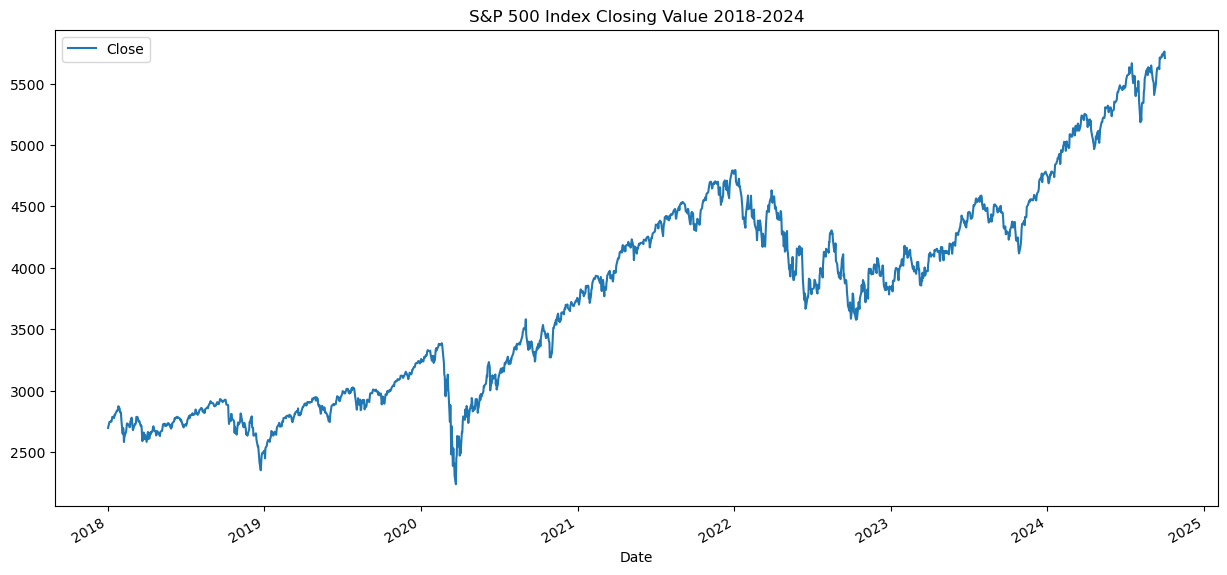

In [21]:
# Plot the closing value of S&P 500 stock index
sp500_data_2018_2024.plot(title="S&P 500 Index Closing Value 2018-2024", figsize=(15,7))


In [22]:
# Join by Columns and add stock tocker as the key
joined_data_cols = pd.concat([apple_data_2018_2024, google_data_2018_2024, microsoft_data_2018_2024, facebook_data_2018_2024, sp500_data_2018_2024], axis="columns", join="inner", keys=["AAPL", "GOOGL", "MSFT", "FB", "S&P 500"])
joined_data_cols

AAPL                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2018-01-02   42.540001   43.075001   42.314999   43.064999   40.568947   
2018-01-03   43.132500   43.637501   42.990002   43.057499   40.561855   
2018-01-04   43.134998   43.367500   43.020000   43.257500   40.750275   
2018-01-05   43.360001   43.842499   43.262501   43.750000   41.214237   
2018-01-08   43.587502   43.902500   43.482498   43.587502   41.061150   
...                ...         ...         ...         ...         ...   
2024-09-24  228.649994  229.350006  225.729996  227.369995  227.369995   
2024-09-25  224.929993  227.289993  224.020004  226.369995  226.369995   
2024-09-26  227.300003  228.500000  225.410004  227.520004  227.520004   
2024-09-27  228.460007  229.520004  227.300003  227.789993  227.789993   
2024-09-30  230.039993  233.000000  229.649994  233.000000  233.000000   

                            GOOGL                                      ...  \
               Volume        Open        High         Low       Close  ...   
Date                                                                   ...   
2018-01-02  102223600   52.651001   53.799000   52.651001   53.660500  ...   
2018-01-03  118071600   53.696499   54.805000   53.671501   54.576000  ...   
2018-01-04   89738400   54.854500   55.203999   54.713001   54.787998  ...   
2018-01-05   94640000   55.172501   55.679001   55.090000   55.514500  ...   
2018-01-08   82271200   55.549999   55.958000   55.500000   55.710499  ...   
...               ...         ...         ...         ...         ...  ...   
2024-09-24   43556100  163.029999  163.220001  160.690002  162.289993  ...   
2024-09-25   42308700  161.470001  162.809998  161.300003  161.490005  ...   
2024-09-26   36636700  163.639999  164.080002  162.279999  162.729996  ...   
2024-09-27   34026000  162.809998  165.699997  162.630005  163.949997  ...   
2024-09-30   54541900  163.320007  166.149994  163.259995  165.850006  ...   

                  MSFT                                FB              \
                 Close   Adj Close    Volume        Open        High   
Date                                                                   
2018-01-02   85.949997   79.792908  22483800  177.679993  181.580002   
2018-01-03   86.349998   80.164268  26061400  181.880005  184.779999   
2018-01-04   87.110001   80.869827  21912000  184.899994  186.210007   
2018-01-05   88.190002   81.872452  23407100  185.589996  186.899994   
2018-01-08   88.279999   81.956001  22113000  187.199997  188.899994   
...                ...         ...       ...         ...         ...   
2024-09-24  429.170013  429.170013  17015800  566.679993  567.750000   
2024-09-25  432.109985  432.109985  13396400  564.049988  576.880005   
2024-09-26  431.309998  431.309998  14492000  575.729980  577.400024   
2024-09-27  428.019989  428.019989  14896100  570.099976  570.840027   
2024-09-30  430.299988  430.299988  16807300  567.700012  574.679993   

                                                          S&P 500  
                   Low       Close   Adj Close    Volume    Close  
Date                                                               
2018-01-02  177.550003  181.419998  180.875412  18151900  2695.81  
2018-01-03  181.330002  184.669998  184.115662  16886600  2713.06  
2018-01-04  184.100006  184.330002  183.776672  13880900  2723.99  
2018-01-05  184.929993  186.850006  186.289108  13574500  2743.15  
2018-01-08  186.330002  188.279999  187.714813  17994700  2747.71  
...                ...         ...         ...       ...      ...  
2024-09-24  554.190002  563.330017  563.330017  12993000  5732.93  
2024-09-25  563.719971  568.309998  568.309998  16543400  5722.26  
2024-09-26  562.349976  567.840027  567.840027  14400800  5745.37  
2024-09-27  564.510010  567.359985  567.359985   9398400  5738.

In [23]:
# Select only closing prices and volume for each stock
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_2018_2024 = closing_prices.loc["2018-01-01":"2024-09-30"]
closing_prices_2018_2024


,AAPL,GOOGL,MSFT,FB,S&P 500
,Close,Close,Close,Close,Close
Date,,,,,
2018-01-02,43.064999,53.660500,85.949997,181.419998,2695.81
2018-01-03,43.057499,54.576000,86.349998,184.669998,2713.06
2018-01-04,43.257500,54.787998,87.110001,184.330002,2723.99
2018-01-05,43.750000,55.514500,88.190002,186.850006,2743.15
2018-01-08,43.587502,55.710499,88.279999,188.279999,2747.71
...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26


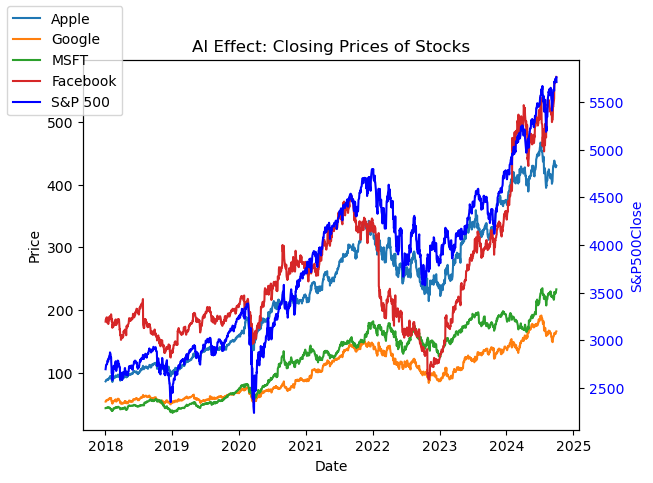

In [24]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(microsoft_data_2018_2024['Close'], label=["MSFT"])
ax1.plot(google_data_2018_2024['Close'], label=["Google"])
ax1.plot(apple_data_2018_2024['Close'], label=["Apple"])
ax1.plot(facebook_data_2018_2024['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_2018_2024['Close'], color="b", label="S&P 500")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500"], loc="upper left")
plt.show()

In [25]:
# Calculate total returns for each stock from 2018-01-01 to 2024-09-30
start_prices = closing_prices_2018_2024.iloc[0]
end_prices = closing_prices_2018_2024.iloc[-1]
total_returns = ((end_prices - start_prices)/start_prices)*100
total_returns


AAPL     Close    441.042627
GOOGL    Close    209.072795
MSFT     Close    400.639910
FB       Close    215.533022
S&P 500  Close    113.756904
dtype: float64

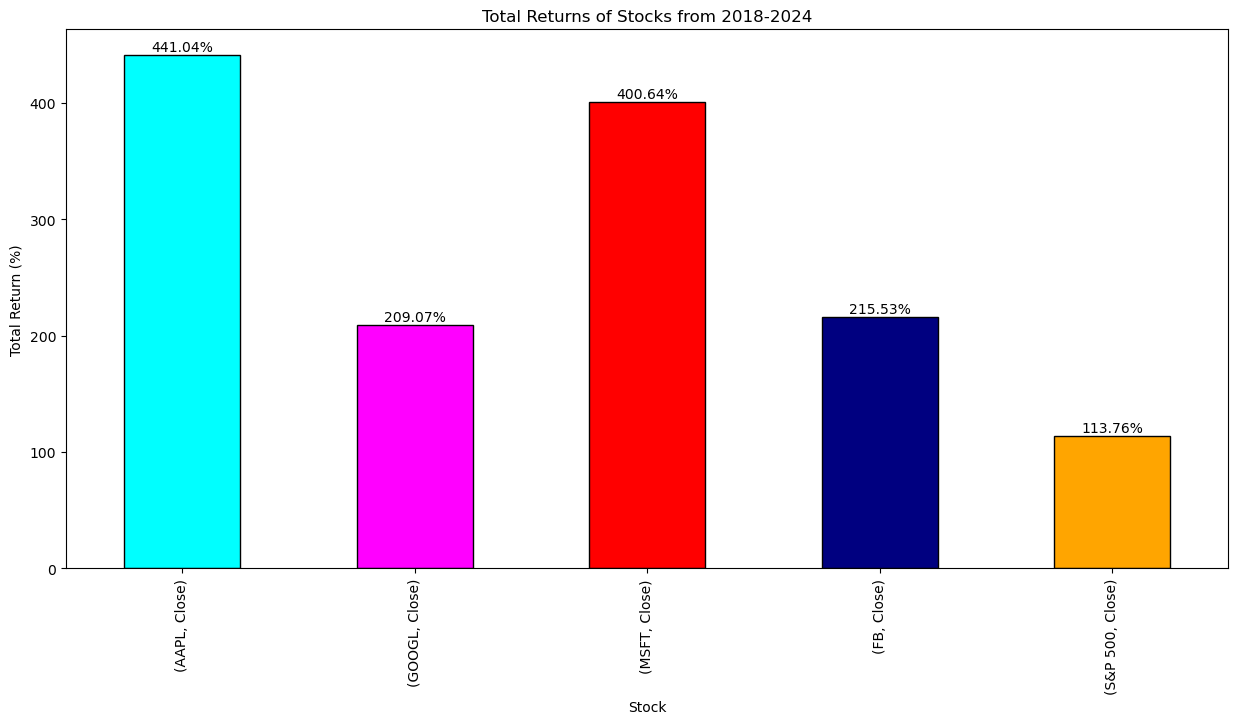

In [26]:
# Chart histogram of total returns
colors = ["cyan", "magenta", "red", "navy", "orange"]
total_returns.plot(kind="bar", title="Total Returns of Stocks from 2018-2024", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Total Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(total_returns):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')

# Show the plot
plt.show()

In [27]:
# Calculate annualized average return for each stock from 2018-01-01 to 2024-09-30

annualized_returns = (closing_prices_2018_2024.pct_change().mean())*252*100
annualized_returns

AAPL     Close    29.882271
GOOGL    Close    21.534390
MSFT     Close    28.192786
FB       Close    26.201640
S&P 500  Close    13.287790
dtype: float64

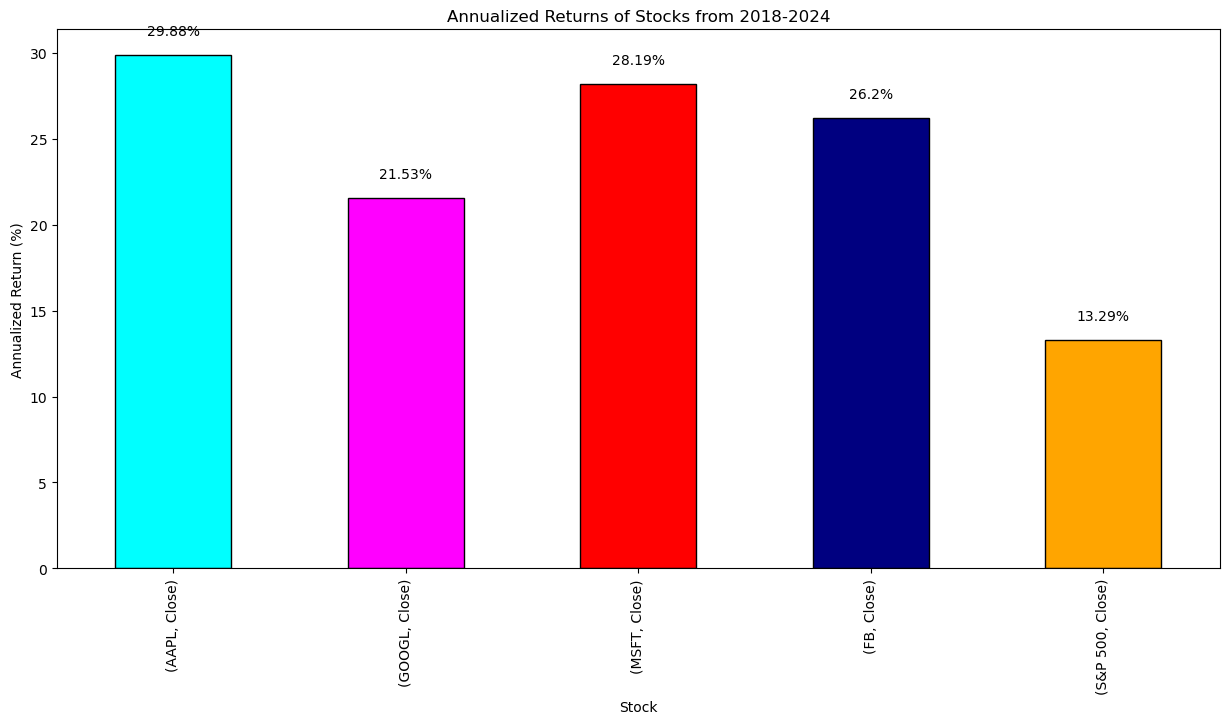

In [28]:
# Chart histogram of total returns
colors = ["cyan", "magenta", "red", "navy", "orange"]
annualized_returns.plot(kind="bar", title="Annualized Returns of Stocks from 2018-2024", color = colors, edgecolor='black', figsize=(15,7))
plt.xlabel("Stock")
plt.ylabel("Annualized Return (%)")

# Label each bar with the percentage return
for i, v in enumerate(annualized_returns):
    plt.text(i, v + 1, str(round(v, 2)) + "%", ha='center', va='bottom')
plt.show()

In [29]:
# Return on all 4 stocks vs S&P 500 since 2023-03-31 (launch of Gemini - Google's AI bot)
closing_prices = joined_data_cols.loc[:, pd.IndexSlice[:, "Close"]]
closing_prices_AI = closing_prices.loc["2023-03-31":"2024-09-30"]
closing_prices_AI

,AAPL,GOOGL,MSFT,FB,S&P 500
,Close,Close,Close,Close,Close
Date,,,,,
2023-03-31,164.899994,103.730003,288.299988,211.940002,4109.31
2023-04-03,166.169998,104.360001,287.230011,213.070007,4124.51
2023-04-04,165.630005,104.720001,287.179993,214.720001,4100.60
2023-04-05,163.759995,104.470001,284.339996,211.479996,4090.38
2023-04-06,164.660004,108.419998,291.600006,216.100006,4105.02
...,...,...,...,...,...
2024-09-24,227.369995,162.289993,429.170013,563.330017,5732.93
2024-09-25,226.369995,161.490005,432.109985,568.309998,5722.26


In [30]:
# Slice S&P 500 data from 2018-01-01 to 2024-10-01
sp500_data_AI = sp500_data.loc['2023-03-31':'2024-10-01']
sp500_data_AI

,Close
Date,
2023-03-31,4109.31
2023-04-03,4124.51
2023-04-04,4100.60
2023-04-05,4090.38
2023-04-06,4105.02
...,...
2024-09-25,5722.26
2024-09-26,5745.37
2024-09-27,5738.17


In [31]:
apple_data_AI = apple_data.loc['2023-03-31':'2024-10-01']
google_data_AI = google_data.loc['2023-03-31':'2024-10-01']
microsoft_data_AI = microsoft_data.loc['2023-03-31':'2024-10-01']
facebook_data_AI = facebook_data.loc['2023-03-31':'2024-10-01']

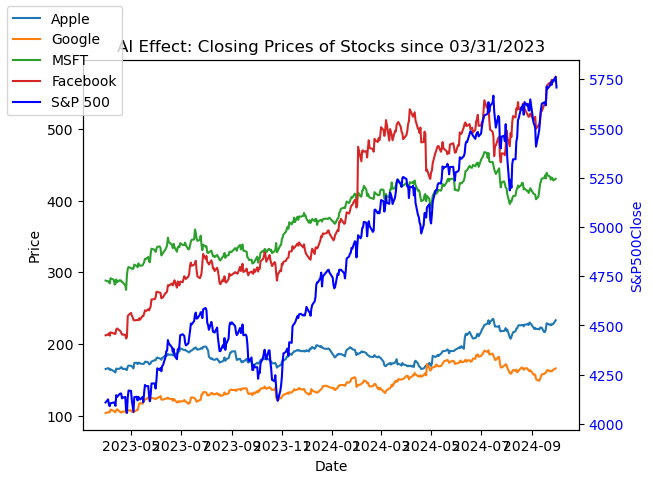

In [32]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the closing prices of the stocks on left y-axis
ax1.plot(apple_data_AI['Close'], label=["MSFT"])
ax1.plot(google_data_AI['Close'], label=["Google"])
ax1.plot(microsoft_data_AI['Close'], label=["Apple"])
ax1.plot(facebook_data_AI['Close'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Price")
ax1.tick_params(axis="y")

# Create a second y-axis for the S&P 500
ax2 = ax1.twinx()

# Plot the S&P 500 on the right y-axis
ax2.plot(sp500_data_AI, color="b", label="S&P 500")
ax2.set_ylabel("S&P500" + "Close", color="b")
ax2.tick_params(axis="y", labelcolor="b")

# Show the plot
plt.title("AI Effect: Closing Prices of Stocks since 03/31/2023")
fig.legend(["Apple", "Google", "MSFT", "Facebook", "S&P 500"], loc="upper left")
plt.show()

In [33]:
# Return on all 4 stocks vs S&P 500 since 2023-03-31 (launch of Gemini - Google's AI bot)
start_prices = closing_prices_AI.iloc[0]
end_prices = closing_prices_AI.iloc[-1]
total_returns_AI = ((end_prices - start_prices)/start_prices)*100
total_returns_AI

AAPL     Close     41.297761
GOOGL    Close     59.886244
MSFT     Close     49.254251
FB       Close    170.095308
S&P 500  Close     40.229868
dtype: float64

In [34]:
# Create a Dataframe for S&P 500 to include date and closing price
df_sp500 = sp500_data_2018_2024.reset_index()[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"})

# Review the S&P 500 dataframe
df_sp500


,ds,y
0,2018-01-02,2695.81
1,2018-01-03,2713.06
2,2018-01-04,2723.99
3,2018-01-05,2743.15
4,2018-01-08,2747.71
...,...,...
1693,2024-09-25,5722.26
1694,2024-09-26,5745.37
1695,2024-09-27,5738.17
1696,2024-09-30,5762.48


<Axes: title={'center': 'S&P 500 Index Closing Value'}, xlabel='ds'>

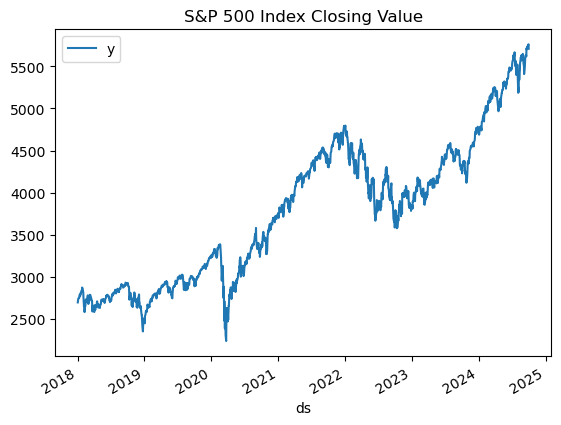

In [35]:
# Plot the S&P 500 dataframe
df_sp500.plot(x="ds", y="y", title="S&P 500 Index Closing Value")

In [36]:
# Create a Prophet model for S&P 500 stock index
from prophet import Prophet
model_sp500 = Prophet()

# Fit the model with S&P 500 data
model_sp500.fit(df_sp500)

# Forecast for S&P 500 stock index for the next 2 years
future_sp500 = model_sp500.make_future_dataframe(periods=365, freq="D")
future_sp500.tail()

Importing plotly failed. Interactive plots will not work.
20:23:28 - cmdstanpy - INFO - Chain [1] start processing
20:23:30 - cmdstanpy - INFO - Chain [1] done processing


,ds
2058,2025-09-27
2059,2025-09-28
2060,2025-09-29
2061,2025-09-30
2062,2025-10-01


In [41]:
# Make predictions for S&P 500 stock index
forecast_sp500 = model_sp500.predict(future_sp500)

# Display the forecast for S&P 500 stock index
forecast_sp500[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2058,2025-09-27,6666.454792,6011.563007,7390.555700
2059,2025-09-28,6664.667797,5986.567602,7385.090653
2060,2025-09-29,6664.938257,6006.011014,7386.637798
2061,2025-09-30,6663.868243,6005.820188,7370.428838
2062,2025-10-01,6660.255579,5961.868032,7382.234842


c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Anand\anaconda3\envs\dev\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(0.5, 1.0, 'Forecast for S&P 500 Stock Index')

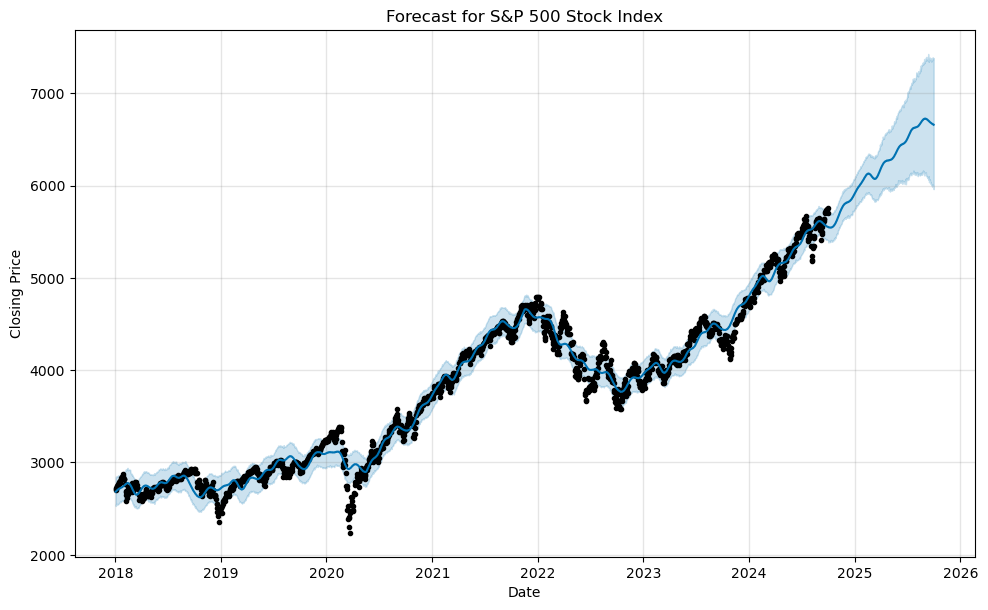

In [43]:
# Plot the forecast for S&P 500 stock index
model_sp500.plot(forecast_sp500, xlabel="Date", ylabel="Closing Price") 
plt.title("Forecast for S&P 500 Stock Index")


In [42]:
volumes = joined_data_cols.loc[:, pd.IndexSlice[:, "Volume"]]
volumes

,AAPL,GOOGL,MSFT,FB
,Volume,Volume,Volume,Volume
Date,,,,
2018-01-02,102223600,31766000,22483800,18151900
2018-01-03,118071600,31318000,26061400,16886600
2018-01-04,89738400,26052000,21912000,13880900
2018-01-05,94640000,30250000,23407100,13574500
2018-01-08,82271200,24644000,22113000,17994700
...,...,...,...,...
2024-09-24,43556100,23332100,17015800,12993000
2024-09-25,42308700,18869200,13396400,16543400


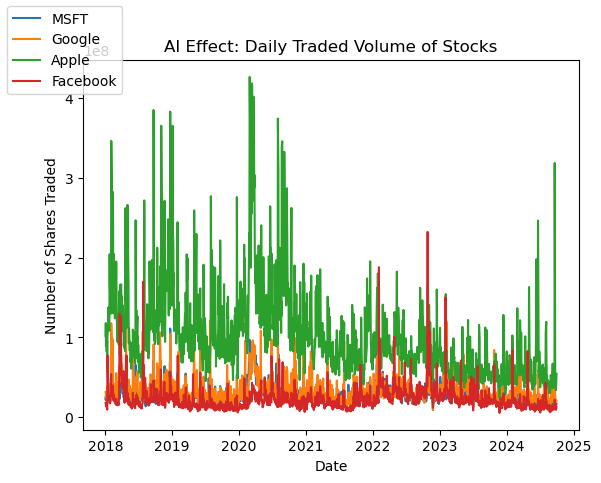

In [44]:
# Create a figure and axis
fig, ax1 = plt.subplots()

# Plot the daily volume of the stocks on left y-axis
ax1.plot(microsoft_data_2018_2024['Volume'], label=["MSFT"])
ax1.plot(google_data_2018_2024['Volume'], label=["Google"])
ax1.plot(apple_data_2018_2024['Volume'], label=["Apple"])
ax1.plot(facebook_data_2018_2024['Volume'], label=["Facebook"])
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Shares Traded")
ax1.tick_params(axis="y")

# Show the plot
plt.title("AI Effect: Daily Traded Volume of Stocks")
fig.legend(["MSFT", "Google", "Apple", "Facebook"], loc="upper left")
plt.show()